## DASK

In [1]:
import dask 

import dask.dataframe as dd
import dask.array as da
import pandas as pd
import numpy as np

In [2]:
from dask.multiprocessing import get
from multiprocessing import cpu_count

nCores = cpu_count()

In [3]:
nCores

4

## Dask Arrays

In [4]:
##numpy arrays
import numpy as np
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
##dask arrays
import dask.array as da
da.arange(100, chunks=5).compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

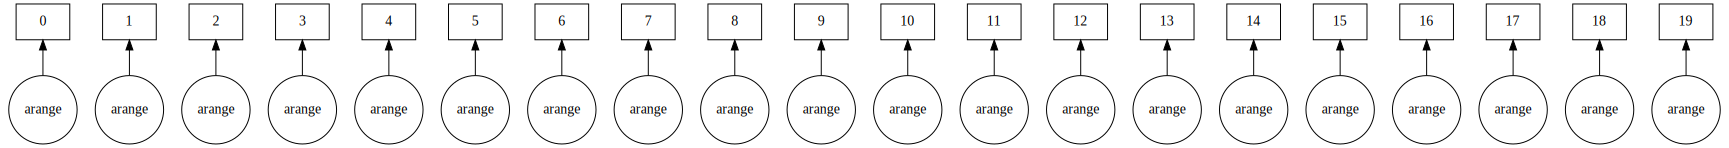

In [6]:
x = da.arange(100, chunks=(5,))
x.visualize('dask.svg')

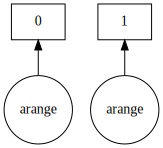

In [7]:
x = da.arange(10, chunks=(5,))
x.visualize('dask.svg')

In [8]:
x.chunks

((5, 5),)

### Convert NumPy array to Dask array

In [9]:
#numpy array
x = np.arange(1000)

#dask array
y = da.from_array(x, chunks=(100))

type(x), type(y)

(numpy.ndarray, dask.array.core.Array)

In [10]:
y.mean().compute()

499.5

In [11]:
x=da.arange(10, chunks=(5))
x

dask.array<arange, shape=(10,), dtype=int64, chunksize=(5,)>

In [12]:
x.compute()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

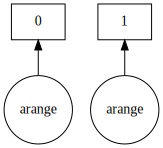

In [13]:
x.visualize('dask.svg')

In [14]:
x=da.arange(11, chunks=(5))
x.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [15]:
x.chunks

((5, 5, 1),)

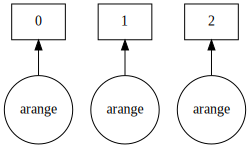

In [16]:
x.visualize('array.svg')

### Similar API

In [17]:
x=da.arange(11, chunks=(5)) #0 to 10
x.sum().compute()

55

In [18]:
x=da.arange(11, chunks=(5))
x.mean().compute()       #55/10

5.0

## PENDING

In [19]:
x = np.array([[1, 2, 3], [4, 5, 6], [3,3,3], [2,43,5], [23,5,2]], np.int32)
x

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 3,  3,  3],
       [ 2, 43,  5],
       [23,  5,  2]], dtype=int32)

In [20]:
y = da.from_array(x, chunks=(2))
y.compute()

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 3,  3,  3],
       [ 2, 43,  5],
       [23,  5,  2]], dtype=int32)

In [21]:
type(x), type(y)

(numpy.ndarray, dask.array.core.Array)

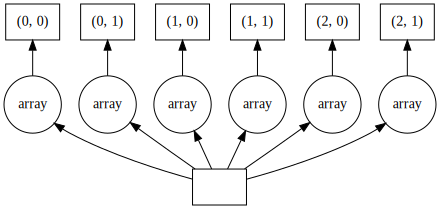

In [22]:
y.visualize('dask.svg')

In [23]:
x = da.array([[1, 2, 3], [4, 5, 6]])
x

[[1, 2, 3], [4, 5, 6]]

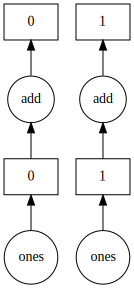

In [24]:
x = da.ones(10, chunks=(5))
y=x+x
y.visualize(filename = 'sdanad.svg')

In [25]:
x.chunks

((5, 5),)

In [26]:
y.compute()

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

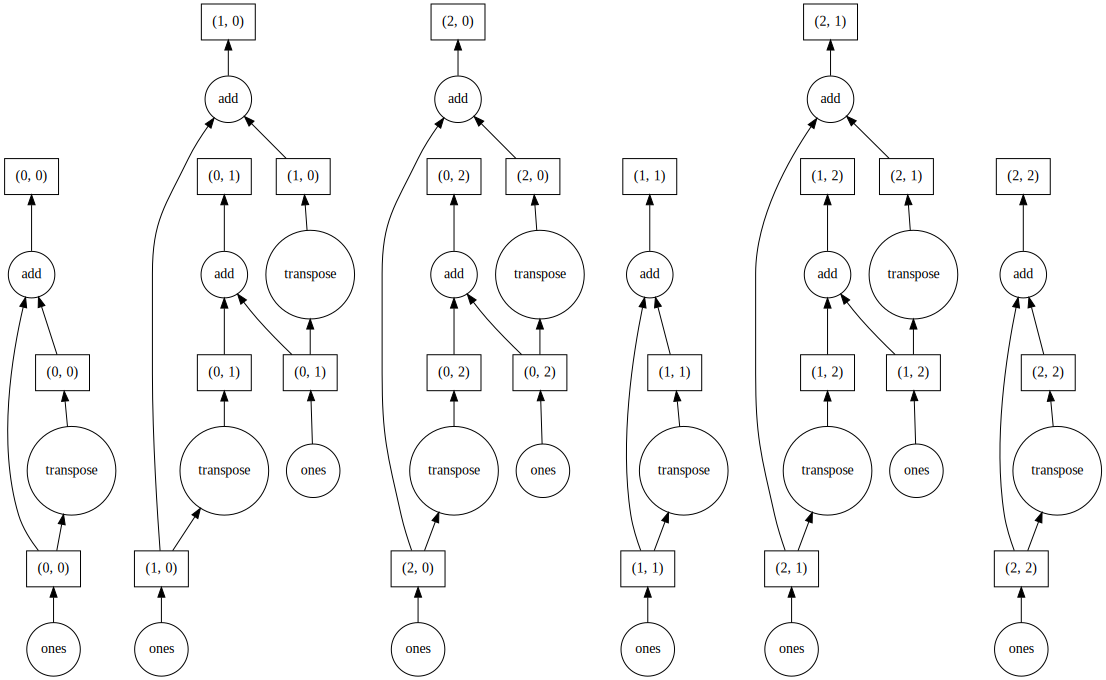

In [27]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))

y = x + x.T

# y.compute()
y.visualize(filename='transpose.svg')


In [28]:
x = da.random.normal(10, 0.1, size=(100000,), chunks=(1000,))  # random dataset 

h= da.histogram(x, bins=100, range=[9, 11])

In [29]:
da.histogram(x, bins=100, range=[9, 11], normed=False, weights=None, density=None)

(dask.array<sum-aggregate, shape=(100,), dtype=int64, chunksize=(100,)>,
 array([  9.  ,   9.02,   9.04,   9.06,   9.08,   9.1 ,   9.12,   9.14,
          9.16,   9.18,   9.2 ,   9.22,   9.24,   9.26,   9.28,   9.3 ,
          9.32,   9.34,   9.36,   9.38,   9.4 ,   9.42,   9.44,   9.46,
          9.48,   9.5 ,   9.52,   9.54,   9.56,   9.58,   9.6 ,   9.62,
          9.64,   9.66,   9.68,   9.7 ,   9.72,   9.74,   9.76,   9.78,
          9.8 ,   9.82,   9.84,   9.86,   9.88,   9.9 ,   9.92,   9.94,
          9.96,   9.98,  10.  ,  10.02,  10.04,  10.06,  10.08,  10.1 ,
         10.12,  10.14,  10.16,  10.18,  10.2 ,  10.22,  10.24,  10.26,
         10.28,  10.3 ,  10.32,  10.34,  10.36,  10.38,  10.4 ,  10.42,
         10.44,  10.46,  10.48,  10.5 ,  10.52,  10.54,  10.56,  10.58,
         10.6 ,  10.62,  10.64,  10.66,  10.68,  10.7 ,  10.72,  10.74,
         10.76,  10.78,  10.8 ,  10.82,  10.84,  10.86,  10.88,  10.9 ,
         10.92,  10.94,  10.96,  10.98,  11.  ]))